In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Read file
csv_file_path = '/Users/liwenxuan/data.csv'
data = pd.read_csv(csv_file_path)
print(data.head())

   from_totally_fake_account  monopoly_money_amount  \
0                    10371.0                   4.00   
1                    88339.0                   2.40   
2                    18555.0                   2.40   
3                    18555.0                   4.10   
4                    80792.0                   1.95   

  to_randomly_generated_account not_happened_yet_date  
0                        CINEMA            01/01/2025  
1                         40544            01/01/2025  
2                         85149            01/01/2025  
3           HIPSTER_COFFEE_SHOP            01/01/2025  
4                         18555            01/01/2025  


In [2]:
# Count the occurrences of each account
account_counts = data['from_totally_fake_account'].value_counts()

# Get the sorted list of accounts based on their occurrence counts
sorted_accounts = account_counts.index.sort_values()

# Create an empty list to store the grouped dataframes
grouped_dfs = []

# Iterate over each account and append the grouped dataframe to the list
for account in sorted_accounts:
    account_data = data[data['from_totally_fake_account'] == account]
    grouped_dfs.append(account_data)

# Concatenate the grouped dataframes into a single dataframe
new_table = pd.concat(grouped_dfs)

# Reset index
new_table.reset_index(drop=True, inplace=True)

# Print the new table
print(new_table.head())

   from_totally_fake_account  monopoly_money_amount  \
0                     1000.0                   8.99   
1                     1000.0                   2.40   
2                     1000.0                   2.55   
3                     1000.0                   2.20   
4                     1000.0                  13.06   

  to_randomly_generated_account not_happened_yet_date  
0             STREAMING_SERVICE            01/01/2025  
1           GOURMET_COFFEE_SHOP            01/01/2025  
2           GOURMET_COFFEE_SHOP            01/01/2025  
3           A_LOCAL_COFFEE_SHOP            01/01/2025  
4                     LOCAL_PUB            01/01/2025  


In [3]:
import numpy as np

# Define the bins for different spending ranges
bins = [0, 50, 100, 200, 300, 400, 500, np.inf]
labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500+']

# Create a new column to represent spending range
data['Spending_Range'] = pd.cut(data['monopoly_money_amount'], bins=bins, labels=labels, right=False)

# Group the data by account and spending range, then count the occurrences
grouped_counts = data.groupby(['from_totally_fake_account', 'Spending_Range']).size().unstack(fill_value=0)

# Reset index to make the dataframe flat
grouped_counts.reset_index(inplace=True)

# Rename the columns
grouped_counts.columns.name = None

# Display the table
print(grouped_counts)

      from_totally_fake_account  0-50  50-100  100-200  200-300  300-400  \
0                        1000.0  1667      27        4        0        0   
1                        1002.0  1000      24        7        0       12   
2                        1006.0  1800      29        0       12        0   
3                        1018.0   749      29       15       12        0   
4                        1053.0  1251      36       20        0       12   
...                         ...   ...     ...      ...      ...      ...   
8137                   100931.0  1614      29        9        0       12   
8138                   100934.0  1026      47       26       12        0   
8139                   100947.0  1499      48       38        1        0   
8140                   100986.0   972      39       23        0        0   
8141                   100988.0  1268      53       18       12        0   

      400-500  500+  
0           0    12  
1           0     0  
2           0     0  

In [4]:
# Convert the 'date' column to datetime if it's not already
data['date'] = pd.to_datetime(data['not_happened_yet_date'])

# Extract month from the 'date' column
data['Month'] = data['date'].dt.month

# Group the data by account and month, then calculate total, max, min, and mean spending
monthly_summary = data.groupby(['from_totally_fake_account', 'Month']).agg(
    Total_Spending=('monopoly_money_amount', 'sum'),
    Max_Spending=('monopoly_money_amount', 'max'),
    Min_Spending=('monopoly_money_amount', 'min'),
    Average_Spending=('monopoly_money_amount', 'mean')
)

# Reset index to make the dataframe flat
monthly_summary.reset_index(inplace=True)

# Display the table
print(monthly_summary)

/var/folders/08/8xyjghbx4p34yd4h1myb66ph0000gn/T/ipykernel_56887/2067290956.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['not_happened_yet_date'])


       from_totally_fake_account  Month  Total_Spending  Max_Spending  \
0                         1000.0      1          999.16         57.96   
1                         1000.0      2         4764.97       1960.00   
2                         1000.0      3         2191.80       1125.00   
3                         1000.0      4         1976.93       1000.00   
4                         1000.0      5          950.09         54.31   
...                          ...    ...             ...           ...   
97699                   100988.0      8         1719.01        287.00   
97700                   100988.0      9         1242.55        287.00   
97701                   100988.0     10         1791.95        287.00   
97702                   100988.0     11         2077.19        287.00   
97703                   100988.0     12         2059.79        287.00   

       Min_Spending  Average_Spending  
0              1.45          6.244750  
1              1.45         33.556127  
2  

In [6]:
import numpy as np
import pandas as pd
# Read file
csv_file_path = '/Users/liwenxuan/data.csv'
data = pd.read_csv(csv_file_path)

# Define the bins for different spending ranges
bins = [0, 50, 100, 200, 300, 400, 500, np.inf]
labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500+']

# Convert the 'date' column to datetime if it's not already
data['date'] = pd.to_datetime(data['not_happened_yet_date'])

# Extract month from the 'date' column
data['Month'] = data['date'].dt.month

# Create a new column to represent spending range
data['Spending_Range1'] = pd.cut(data['monopoly_money_amount'], bins=bins, labels=labels, right=False)

# Group the data by account, month, and spending range, then count the occurrences
grouped_counts1 = data.groupby(['from_totally_fake_account', 'Month', 'Spending_Range1']).size().unstack(fill_value=0)

# Sum the counts of each spending range for each account and month
grouped_counts1['Total_Count'] = grouped_counts1.sum(axis=1)

# Reset index to make the dataframe flat
grouped_counts1.reset_index(inplace=True)

# Display the table
print(grouped_counts1)

/var/folders/08/8xyjghbx4p34yd4h1myb66ph0000gn/T/ipykernel_57015/781605027.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['not_happened_yet_date'])


Spending_Range1  from_totally_fake_account  Month  0-50  50-100  100-200  \
0                                   1000.0      1   158       2        0   
1                                   1000.0      2   139       1        0   
2                                   1000.0      3   129       1        1   
3                                   1000.0      4   137       1        0   
4                                   1000.0      5   139       2        0   
...                                    ...    ...   ...     ...      ...   
97699                             100988.0      8   101       5        2   
97700                             100988.0      9    76       4        1   
97701                             100988.0     10    95       7        2   
97702                             100988.0     11   121       7        3   
97703                             100988.0     12   133       8        1   

Spending_Range1  200-300  300-400  400-500  500+  Total_Count  
0                      

/var/folders/08/8xyjghbx4p34yd4h1myb66ph0000gn/T/ipykernel_2680/3487582527.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['not_happened_yet_date'])


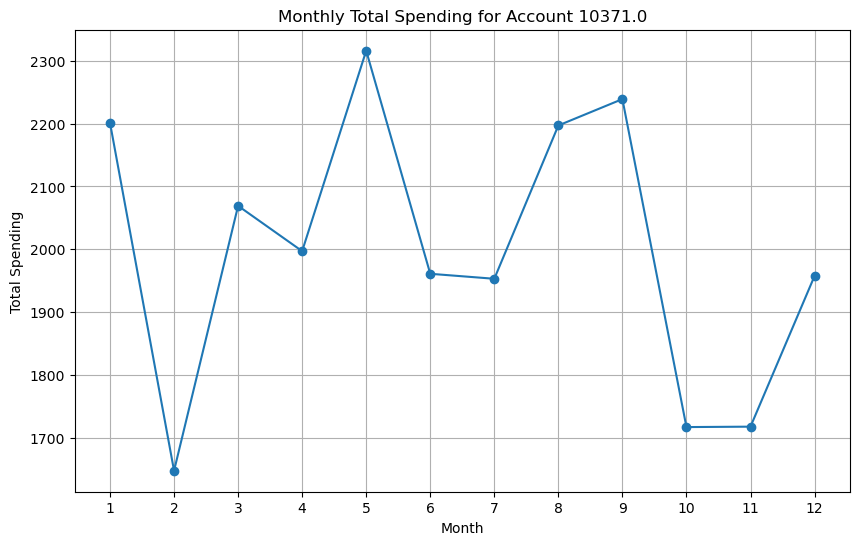

Press Enter to continue...


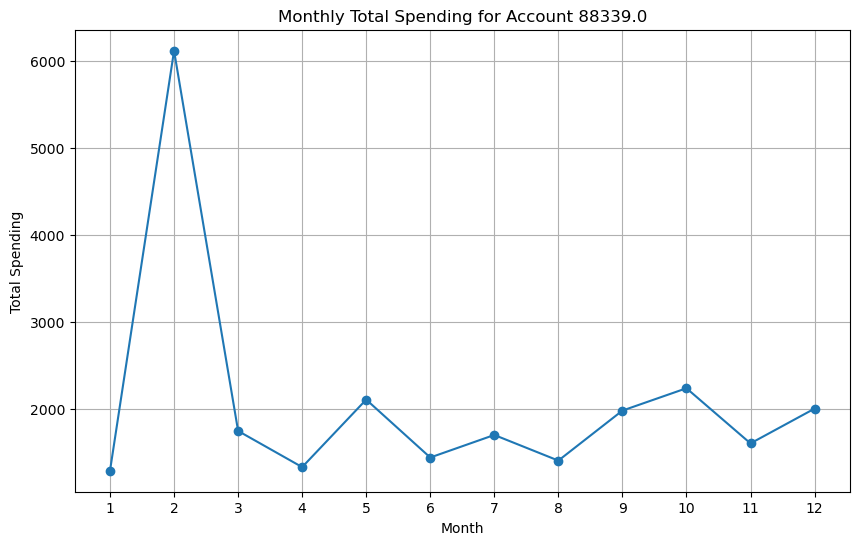

Press Enter to continue...


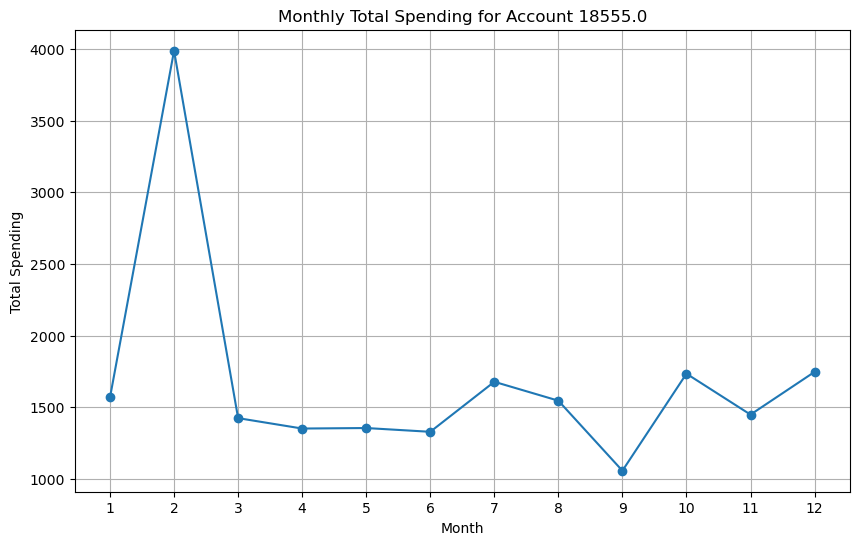

Press Enter to continue...


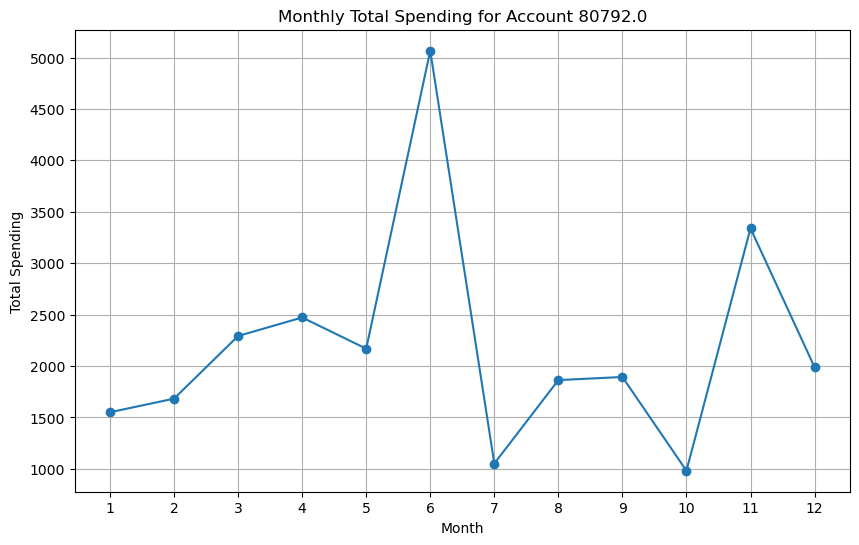

Press Enter to continue...


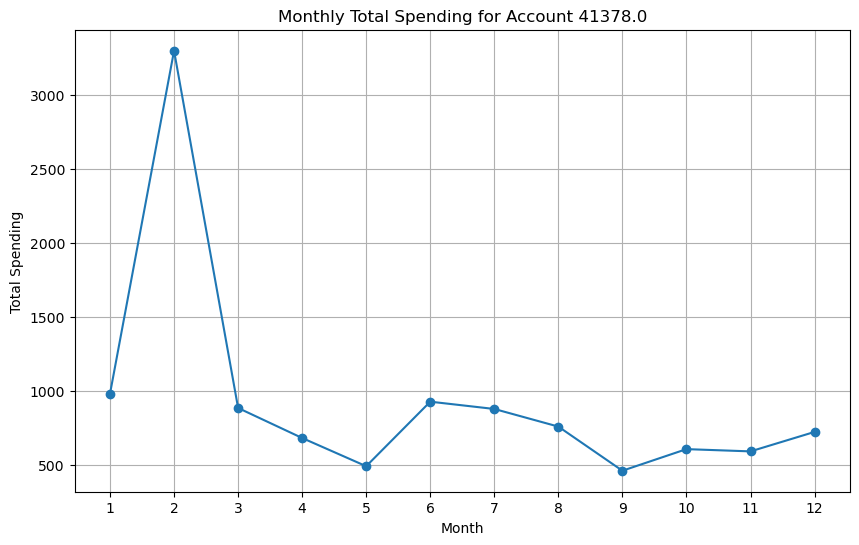

Press Enter to continue...


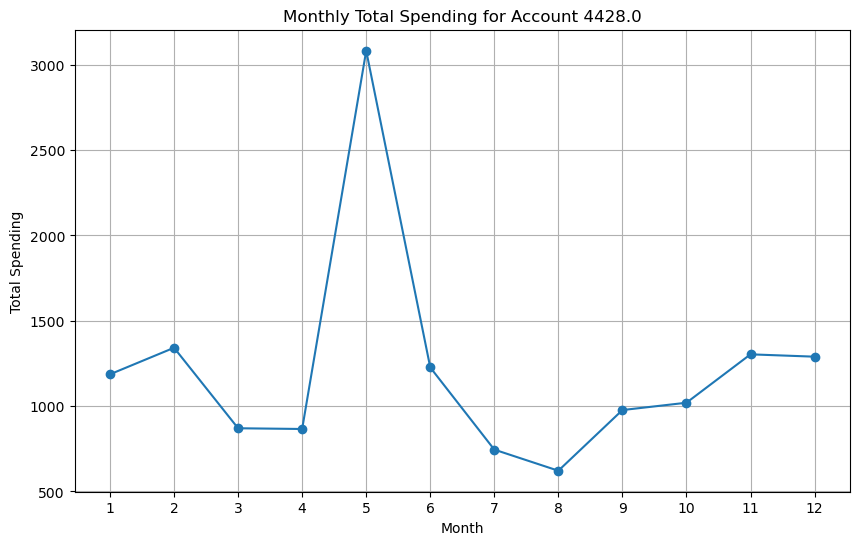

Press Enter to continue...


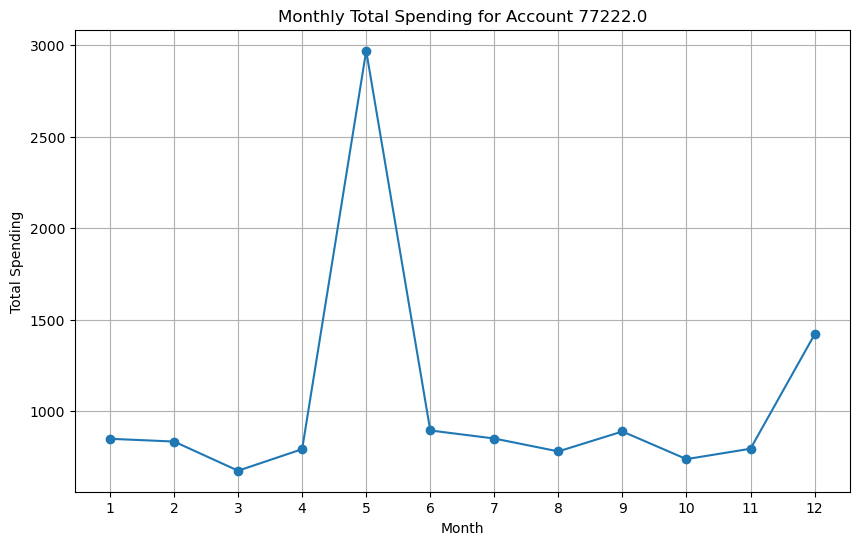

Press Enter to continue...


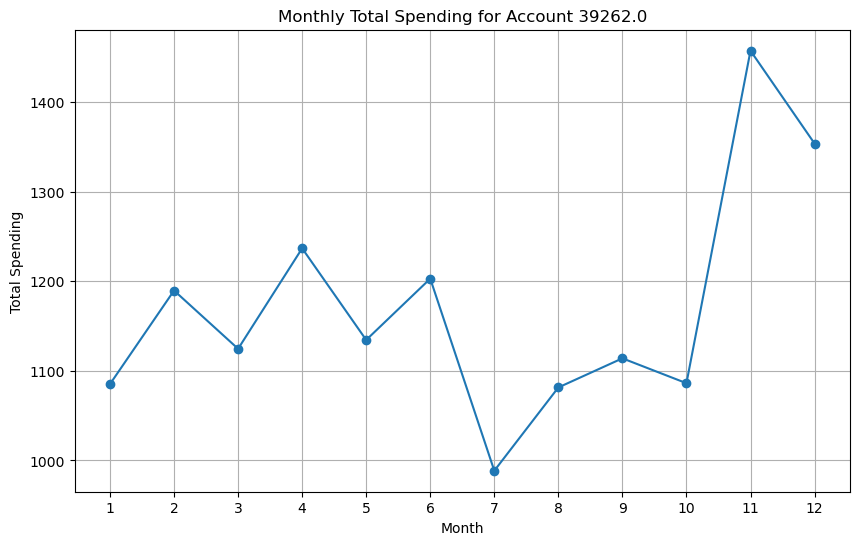

Press Enter to continue...


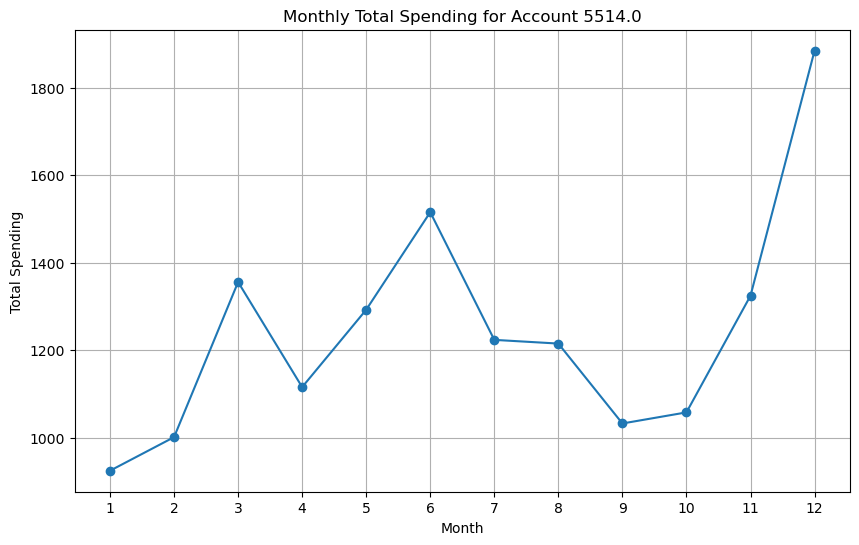

Press Enter to continue...


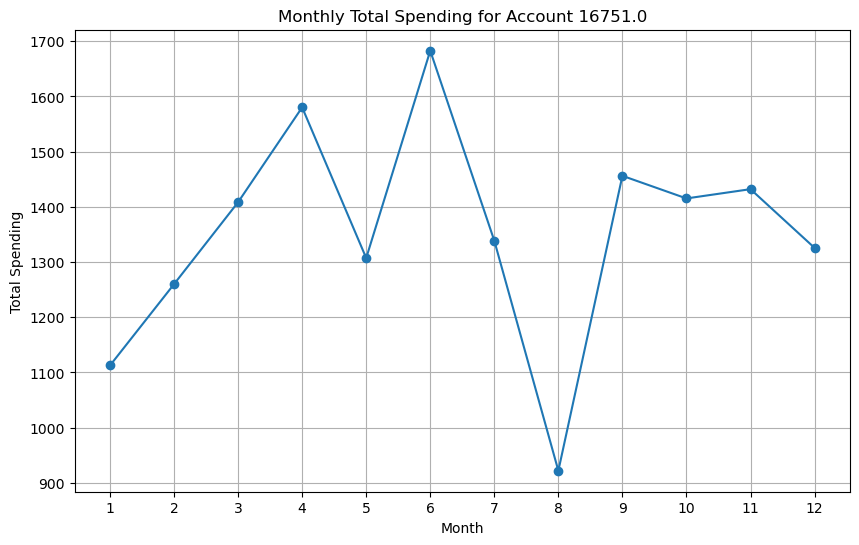

Press Enter to continue...


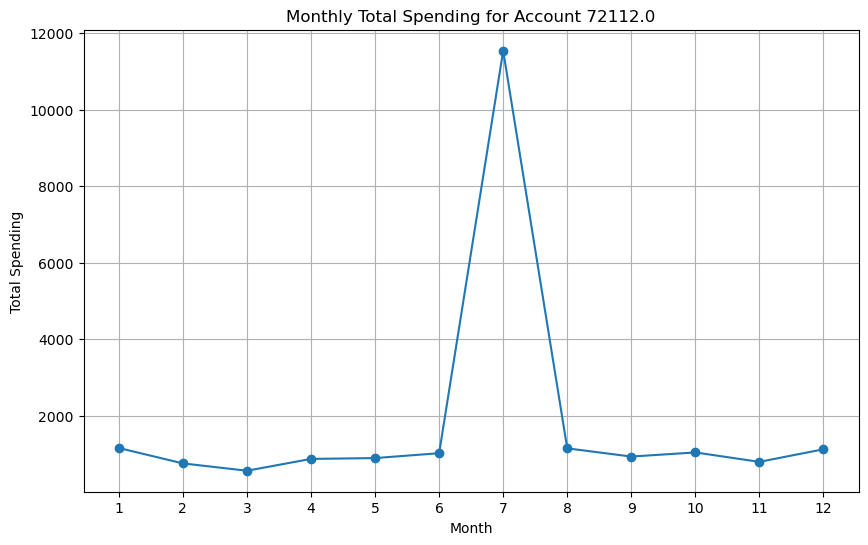

Press Enter to continue...


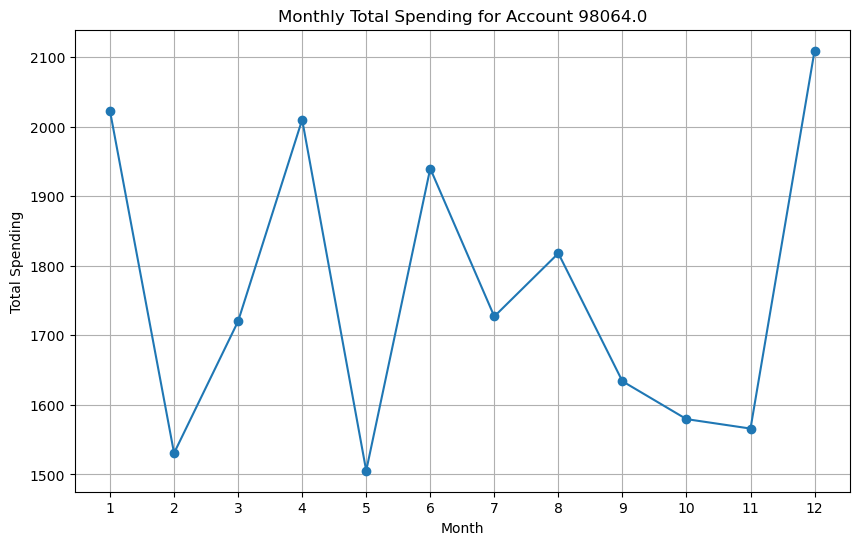

Press Enter to continue...


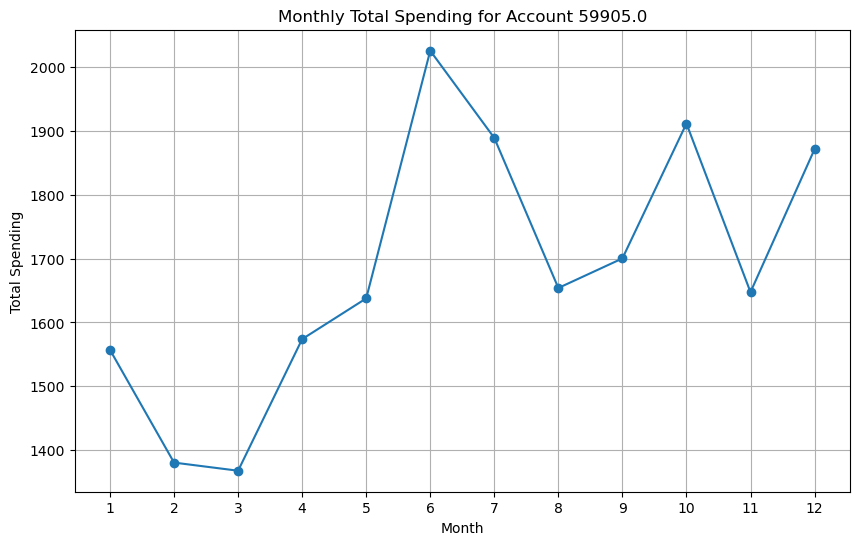

Press Enter to continue...


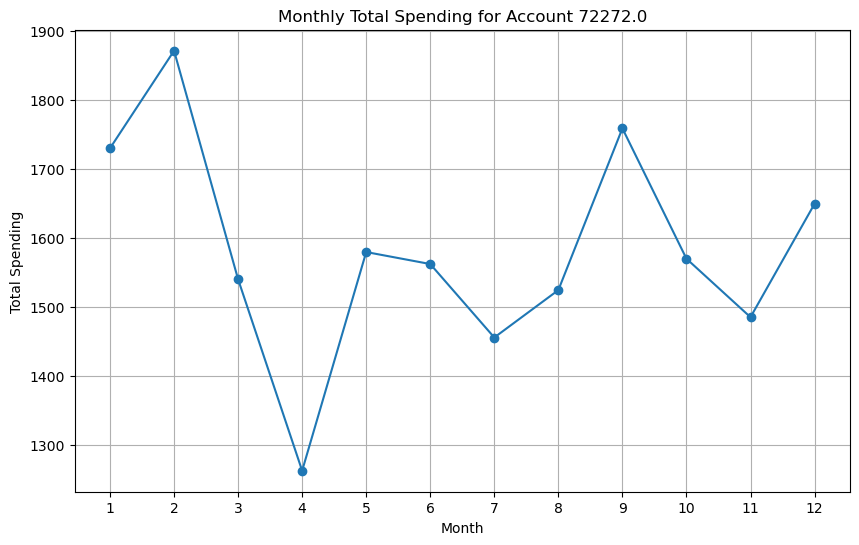

Press Enter to continue...


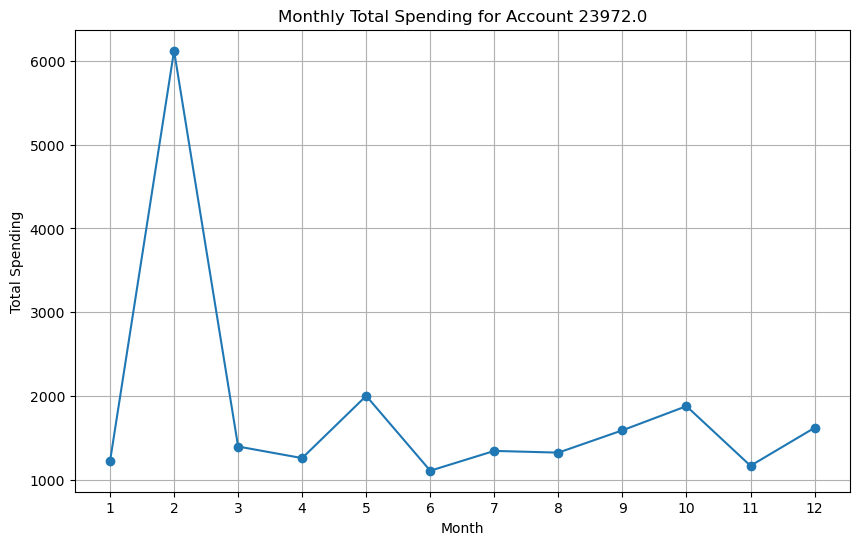

Press Enter to continue...


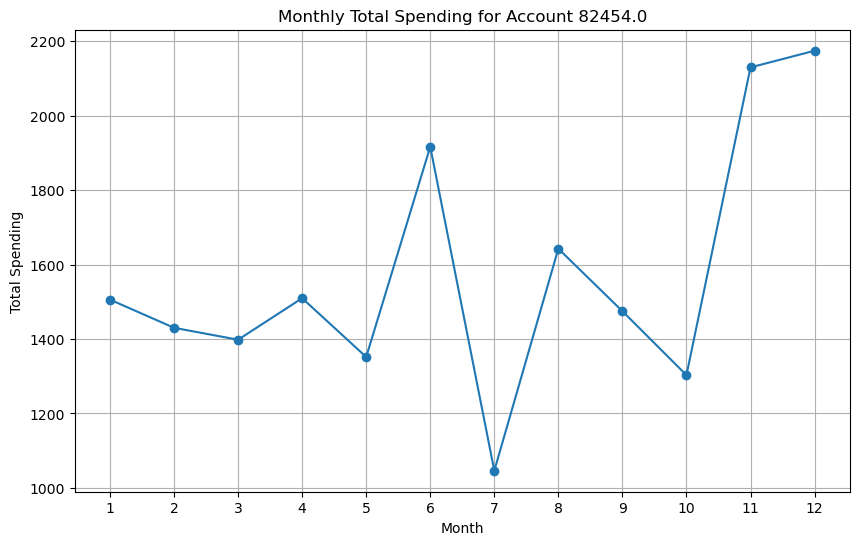

Press Enter to continue...


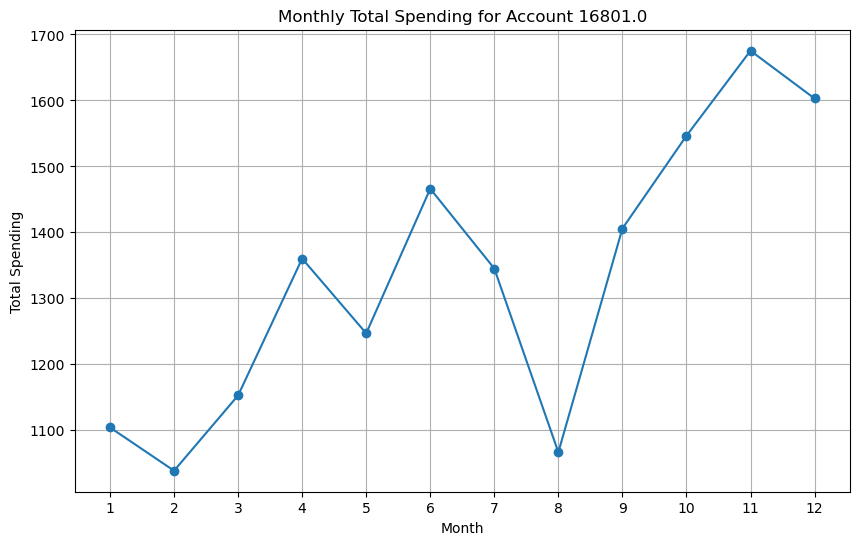

Press Enter to continue...


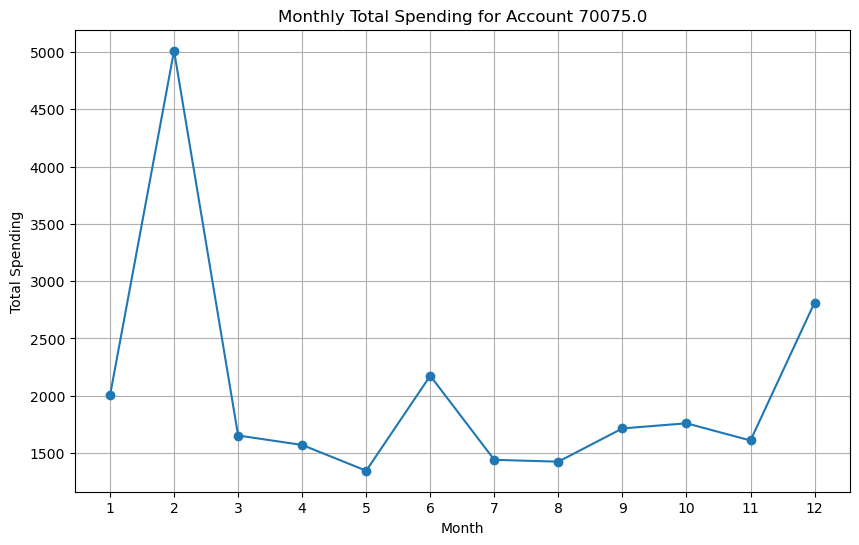

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file_path = '/Users/liwenxuan/data.csv'
data = pd.read_csv(csv_file_path)

data['date'] = pd.to_datetime(data['not_happened_yet_date'])

data['Month'] = data['date'].dt.month

all_accounts = data['from_totally_fake_account'].unique()

for account in all_accounts:
    
    account_data = data[data['from_totally_fake_account'] == account]
    
    monthly_total_spending = account_data.groupby('Month')['monopoly_money_amount'].sum()
    
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_total_spending.index, monthly_total_spending.values, marker='o', linestyle='-')
    plt.title('Monthly Total Spending for Account {}'.format(account))
    plt.xlabel('Month')
    plt.ylabel('Total Spending')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

    
    input("Press Enter to continue...")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file_path = '/Users/liwenxuan/data.csv'
data = pd.read_csv(csv_file_path)


data['date'] = pd.to_datetime(data['not_happened_yet_date'])


data['Month'] = data['date'].dt.month


all_accounts = data['from_totally_fake_account'].unique()


num_plots_to_show = 5


for i, account in enumerate(all_accounts[:num_plots_to_show]):
    
    account_data = data[data['from_totally_fake_account'] == account]
    
    monthly_total_spending = account_data.groupby('Month')['monopoly_money_amount'].sum()
    
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_total_spending.index, monthly_total_spending.values, marker='o', linestyle='-')
    plt.title('Monthly Total Spending for Account {}'.format(account))
    plt.xlabel('Month')
    plt.ylabel('Total Spending')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

/var/folders/08/8xyjghbx4p34yd4h1myb66ph0000gn/T/ipykernel_9981/792488155.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['not_happened_yet_date'])


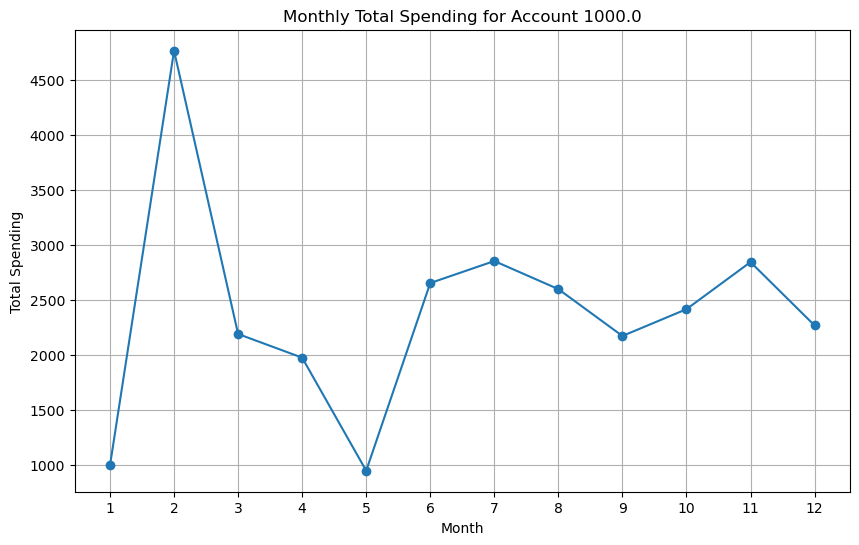

按 Enter 键继续...


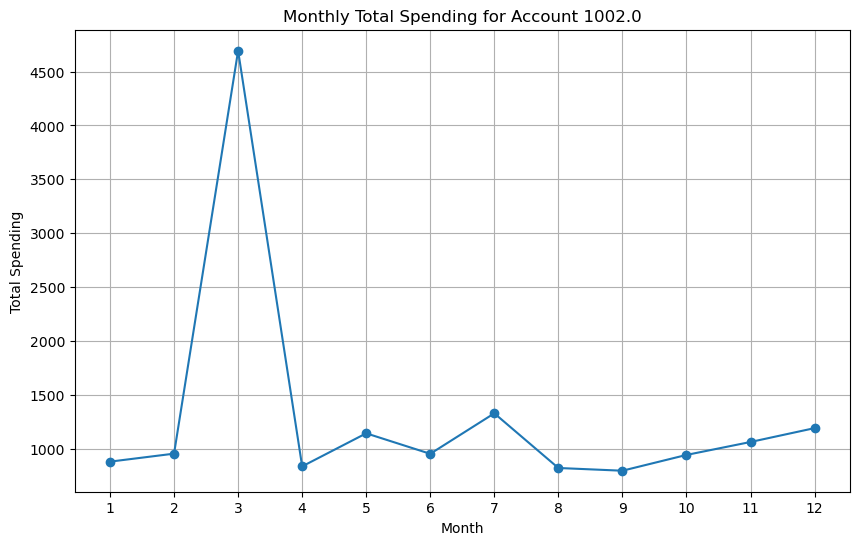

按 Enter 键继续...


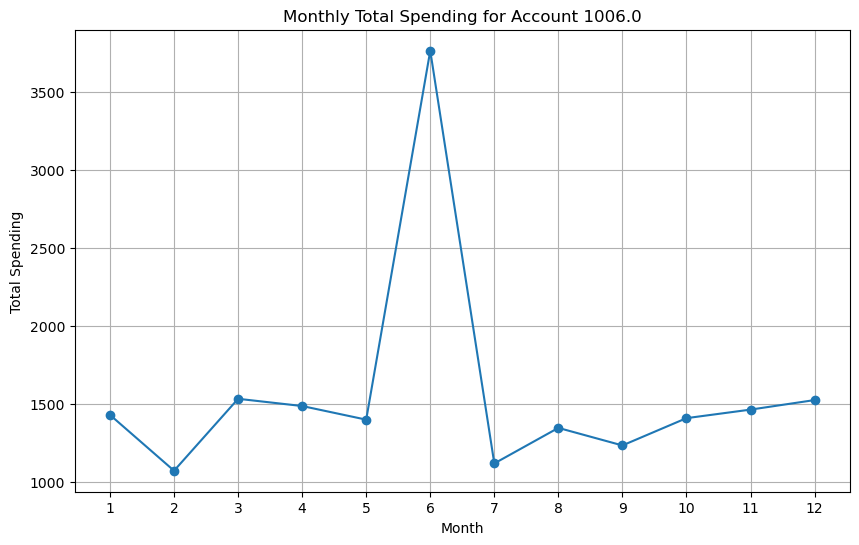

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = '/Users/liwenxuan/data.csv'
data = pd.read_csv(csv_file_path)

data['date'] = pd.to_datetime(data['not_happened_yet_date'])

data['Month'] = data['date'].dt.month

all_accounts = sorted(data['from_totally_fake_account'].unique())

for account in all_accounts:
    
    account_data = data[data['from_totally_fake_account'] == account]
    
    monthly_total_spending = account_data.groupby('Month')['monopoly_money_amount'].sum()
    
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_total_spending.index, monthly_total_spending.values, marker='o', linestyle='-')
    plt.title('Monthly Total Spending for Account {}'.format(account))
    plt.xlabel('Month')
    plt.ylabel('Total Spending')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

    
    input("Press Enter to continue...")